# **SPX**

In [ ]:
'''
url = 'https://finance.yahoo.com/quote/FB/history?period1=1337299200&period2=1631232000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
df = pd.read_html(requests.get(url, headers = {'User-agent' : 'Mozilla/5.0'}).text)[0]
'''

"\nurl = 'https://finance.yahoo.com/quote/FB/history?period1=1337299200&period2=1631232000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'\ndf = pd.read_html(requests.get(url, headers = {'User-agent' : 'Mozilla/5.0'}).text)[0]\n"

In [ ]:
'''
import io

class YahooData:
  def fetch(ticker, start, end, frequency, events, include_adj_close = 'true'):
    """
    ticker: <str>
      name of the stock
    start/end: <str>
      interval of dates period in format 'yyyy-mm-dd'
    frequency: <str>
      the step of the table: 1d, 1wk, 1mo
    events: <str>
      what kind of data you need: history/splits/capitalGain/div
    include_adj_close: <str>
      true/false for including adjusted close price
      not bool because you add it as a part of str
    """
    headers ={'User-agent': 'Mozilla/5.0'}

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&events"+str(events) +"&includeAdjustedClose=" + str(include_adj_close)
    
    r = requests.get(url, headers=headers)
    df = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return df


df = YahooData.fetch("SPX", start="2012-02-18", end="2022-02-18", 
                             frequency='1d', events = 'history', include_adj_close = 'true' )
'''

'\nimport io\n\nclass YahooData:\n  def fetch(ticker, start, end, frequency, events, include_adj_close = \'true\'):\n    """\n    ticker: <str>\n      name of the stock\n    start/end: <str>\n      interval of dates period in format \'yyyy-mm-dd\'\n    frequency: <str>\n      the step of the table: 1d, 1wk, 1mo\n    events: <str>\n      what kind of data you need: history/splits/capitalGain/div\n    include_adj_close: <str>\n      true/false for including adjusted close price\n      not bool because you add it as a part of str\n    """\n    headers ={\'User-agent\': \'Mozilla/5.0\'}\n\n    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)\n    x = int(datetime.strptime(start, \'%Y-%m-%d\').strftime("%s"))\n    y = int(datetime.strptime(end, \'%Y-%m-%d\').strftime("%s"))\n    url += "?period1=" + str(x) + "&period2=" + str(y) + "&events"+str(events) +"&includeAdjustedClose=" + str(include_adj_close)\n    \n    r = requests.get(url, headers=headers)\n    df = pd

# **Data manipulation**

In [ ]:
import pandas as pd
import requests
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('HistoricalPrices.csv')

In [ ]:
data['Date'] =pd.to_datetime(data.Date)

In [ ]:
data_SPX = data.sort_values(by="Date")
data_SPX

,Date,Open,High,Low,Close
2340,2012-11-02,1427.59,1434.27,1412.91,1414.20
2339,2012-11-05,1414.02,1419.90,1408.13,1417.26
2338,2012-11-06,1417.26,1433.38,1417.26,1428.39
2337,2012-11-07,1428.27,1428.27,1388.14,1394.53
2336,2012-11-08,1394.53,1401.23,1377.51,1377.51
...,...,...,...,...,...
4,2022-02-14,4412.61,4426.22,4364.84,4401.67
3,2022-02-15,4429.28,4472.77,4429.28,4471.07
2,2022-02-16,4455.75,4489.55,4429.68,4475.01
1,2022-02-17,4456.06,4456.06,4373.81,4380.26


In [ ]:
data_SPX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 2340 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2341 non-null   datetime64[ns]
 1   Open    2341 non-null   float64       
 2   High    2341 non-null   float64       
 3   Low     2341 non-null   float64       
 4   Close   2341 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 109.7 KB


In [ ]:
import plotly.express as px

fig = px.scatter(data_SPX, x="Date", y="Open", title='Open SPX prices 2012-2022')
fig.update_traces(marker=dict(size=3))

fig.add_vline(x="2018-12-26", line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x="2020-03-11", line_width=3, line_dash="dash", line_color="red")

fig.show()

In [ ]:
data_SPX['Date Difference'] = data_SPX['Date'].diff()

In [ ]:
data_SPX.head()

,Date,Open,High,Low,Close,Date Difference
2340,2012-11-02,1427.59,1434.27,1412.91,1414.20,NaT
2339,2012-11-05,1414.02,1419.90,1408.13,1417.26,3 days
2338,2012-11-06,1417.26,1433.38,1417.26,1428.39,1 days
2337,2012-11-07,1428.27,1428.27,1388.14,1394.53,1 days
2336,2012-11-08,1394.53,1401.23,1377.51,1377.51,1 days


In [ ]:
# each row is "today", the difference shows when the previous working day was

data_SPX_overnight = data_SPX.loc[data_SPX['Date Difference'] == "1 days"] # open этого дня, close дня который был с индексом -1
data_SPX_weekends = data_SPX.loc[data_SPX['Date Difference'] == "3 days"]
data_SPX_long = data_SPX.loc[data_SPX['Date Difference'] == "4 days"]

### **Overnight returns**

$r_{SPX} = \frac{P^c_{t-1}-P^o_t}{P^o_t} \cdot 100 \%$, where:

$r_{SPX}$ - Return on a stock $SPX$

$P^c_{t-1}$ - Close price of a stock at time $t-1$ – that is, the close price on the previous day $t-1$.

$P^o_{t}$ - Open price of a stock at time $t$ – that is, the open price on the current day $t$.

In [ ]:
overnight_returns_SPX = []
log_overnight_SPX = []
dates_overnight_SPX = []
for index in data_SPX_overnight.iloc[1: , :].iterrows():
  P_t1 = data_SPX["Close"][index[0]+1]
  P_t = data_SPX_overnight["Open"][index[0]]
  log_overnight_SPX.append(np.log(P_t/P_t1))
  overnight_returns_SPX.append((P_t1 - P_t)/ P_t * 100)
  dates_overnight_SPX.append(data_SPX_overnight["Date"][index[0]])

#print(len(overnight_returns))
#print(len(data_SPX_overnight))

data_overnight_SPX = pd.DataFrame({'Date':dates_overnight_SPX, 'Overnight Returns':overnight_returns_SPX})

conditions = [
    (data_overnight_SPX['Date'] < '2018-12-26'),
    ((data_overnight_SPX['Date'] >= '2018-12-26') & (data_overnight_SPX['Date'] < '2020-03-11')),
    (data_overnight_SPX['Date'] >= '2020-03-11')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_overnight_SPX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_overnight_SPX.head()

,Date,Overnight Returns,Periods
0,2012-11-07,0.008402,period 1
1,2012-11-08,0.000000,period 1
2,2012-11-09,-0.002904,period 1
3,2012-11-13,0.000000,period 1
4,2012-11-14,-0.008002,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_overnight_SPX, y=overnight_returns_SPX,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))


fig.update_layout(title='Overnight returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Overnight Returns, %')


fig.show()

### **Weekend Returns**

$r_{SPX} = \frac{P^c_{F}-P^o_M}{P^o_M} \cdot 100 \%$, where:

$r_{SPX}$ - Return on a stock $SPX$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{M}$ - Open price of a stock on Monday $M$.

In [ ]:
weekend_returns_SPX = []
dates_weekends_SPX = []
for index in data_SPX_weekends.iloc[1: , :].iterrows():
  P_t1 = data_SPX["Close"][index[0]+1]
  P_t = data_SPX_weekends["Open"][index[0]]
  weekend_returns_SPX.append((P_t1 - P_t)/ P_t * 100)
  dates_weekends_SPX.append(data_SPX_weekends["Date"][index[0]])

#print(len(weekend_returns))
#print(len(data_SPX_weekends))

data_weekends_SPX = pd.DataFrame({'Date':dates_weekends_SPX, 'Weekend Returns':weekend_returns_SPX})

conditions = [
    (data_weekends_SPX['Date'] < '2018-12-26'),
    ((data_weekends_SPX['Date'] >= '2018-12-26') & (data_weekends_SPX['Date'] < '2020-03-11')),
    (data_weekends_SPX['Date'] >= '2020-03-11')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_weekends_SPX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_weekends_SPX.head()

,Date,Weekend Returns,Periods
0,2012-11-12,-0.000725,period 1
1,2012-11-19,0.000000,period 1
2,2012-11-26,0.000000,period 1
3,2012-12-03,-0.011297,period 1
4,2012-12-10,0.000000,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_weekends_SPX, y=weekend_returns_SPX,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))



fig.update_layout(title='Over-the-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Weekend Returns, %')

fig.show()


### **Long-Weekend Returns**

$r_{SPX} = \frac{P^c_{F}-P^o_T}{P^o_T} \cdot 100 \%$, where:

$r_{SPX}$ - Return on a stock $SPX$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{T}$ - Open price of a stock on Tuesday $T$.

In [ ]:
long_returns_SPX = []
dates_long_SPX = []
for index in data_SPX_long.iloc[1: , :].iterrows():
  P_t1 = data_SPX["Close"][index[0]+1]
  P_t = data_SPX_long["Open"][index[0]]
  long_returns_SPX.append((P_t1 - P_t) / P_t * 100)
  dates_long_SPX.append(data_SPX_long["Date"][index[0]])

#print(len(long_returns))
#print(len(data_SPX_long))

data_long_SPX = pd.DataFrame({'Date':dates_long_SPX, 'Long-weekend Returns':long_returns_SPX})

conditions = [
    (data_long_SPX['Date'] < '2018-12-26'),
    ((data_long_SPX['Date'] >= '2018-12-26') & (data_long_SPX['Date'] < '2020-03-11')),
    (data_long_SPX['Date'] >= '2020-03-11')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_long_SPX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_long_SPX.head()

,Date,Long-weekend Returns,Periods
0,2013-02-19,0.000000,period 1
1,2013-04-01,0.000637,period 1
2,2013-05-28,-0.183344,period 1
3,2013-09-03,-0.182157,period 1
4,2014-01-21,-0.127645,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_long_SPX, y=long_returns_SPX,
                    mode='lines',
                    name='lines',
                    line=dict(color='royalblue', width=1)))


fig.update_layout(title='Over-the-long-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Long-weekend Returns, %')

fig.show()

## **Statistical analysis of the result**




### **Summary Statistics**

In [ ]:
df1 = data_overnight_SPX.describe()
df2 = data_weekends_SPX.describe()
df3 = data_long_SPX.describe()

frames = [df1, df2, df3]

result = pd.concat(frames, axis=1)
result

,Overnight Returns,Weekend Returns,Long-weekend Returns
count,1829.000000,424.000000,59.000000
mean,-0.032112,-0.004452,-0.011675
std,0.406535,0.600139,0.421307
min,-4.565696,-3.476349,-1.618798
25%,-0.155862,-0.152751,-0.177686
50%,-0.018368,-0.009286,-0.034929
75%,0.080562,0.094442,0.221707
max,4.200908,8.069473,1.633510


## **Check for Normality**

In [ ]:
print(stats.kstest(data_long_SPX[data_long_SPX['Periods']=="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_SPX[data_long_SPX['Periods']!="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_SPX['Long-weekend Returns'], 'norm'))

KstestResult(statistic=0.33643232005868295, pvalue=0.00024420886096824775)
KstestResult(statistic=0.21614003675015964, pvalue=0.24317281257013834)
KstestResult(statistic=0.27041983120944124, pvalue=0.00026600573352648823)


In [ ]:
print(stats.kstest(data_weekends_SPX[data_weekends_SPX['Periods']=="period 1"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_SPX[data_weekends_SPX['Periods']=="period 2"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_SPX[data_weekends_SPX['Periods']=="period 3"]['Weekend Returns'], 'norm'))

KstestResult(statistic=0.3383500273877106, pvalue=3.337563700382779e-29)
KstestResult(statistic=0.2272433768349371, pvalue=0.0050480149917991905)
KstestResult(statistic=0.22981810039822004, pvalue=0.00016016957627216927)


In [ ]:
print(stats.kstest(data_overnight_SPX[data_overnight_SPX['Periods']=="period 1"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_SPX[data_overnight_SPX['Periods']=="period 2"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_SPX[data_overnight_SPX['Periods']=="period 3"]['Overnight Returns'], 'norm'))

KstestResult(statistic=0.34282864155886084, pvalue=4.683520900028165e-127)
KstestResult(statistic=0.23859664052367247, pvalue=3.314496169446633e-12)
KstestResult(statistic=0.22771625218863423, pvalue=3.2805456297200247e-18)


1. Over-The-Long-Weekend Returns are distributed according to a Normal Distribution over the **period of 2-3** at any reasonable significance levels.

2. As for the other two samples, $H_0$ is rejected due to extremely small $p$-values. Thus, Over-the-weekend Returns and Overnight Returns are likely to be distributed according to non-normal distributions.

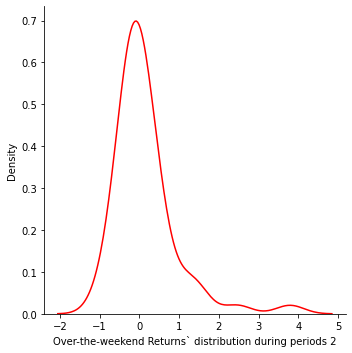

In [ ]:
p = sns.displot(data_weekends_SPX[data_weekends_SPX['Periods']=="period 2"], x="Weekend Returns", kind="kde", color='red')
p.set(xlabel='Over-the-weekend Returns` distribution during periods 2', ylabel='Density')

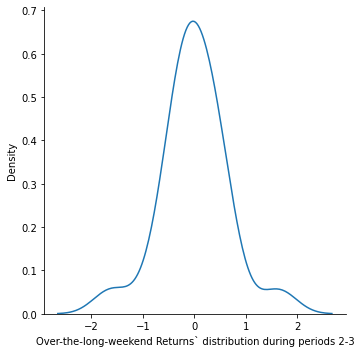

In [ ]:
p = sns.displot(data_long_SPX[data_long_SPX['Periods']!="period 1"], x="Long-weekend Returns", kind="kde")
p.set(xlabel='Over-the-long-weekend Returns` distribution during periods 2-3', ylabel='Density')

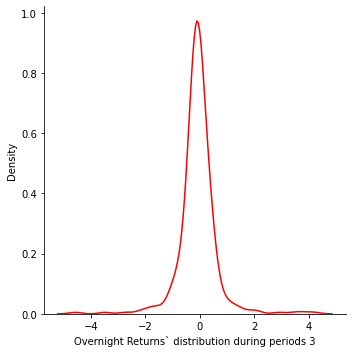

In [ ]:
p = sns.displot(data_overnight_SPX[data_overnight_SPX['Periods']=="period 3"], x="Overnight Returns", kind="kde", color='red')
p.set(xlabel='Overnight Returns` distribution during periods 3', ylabel='Density')

## **Boxplots**

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, subplot_titles=("Overnight", "Weekend", "Long-Weekend"))

# PERIOD 1

fig.add_trace(
    go.Box(y=data_overnight_SPX['Overnight Returns'], x=data_overnight_SPX['Periods'], name="Overnight Returns", jitter =1, marker=dict(size=3)),
    row=1, col=1)



# PERIOD 2

fig.add_trace(
    go.Box(y=data_weekends_SPX['Weekend Returns'], x=data_weekends_SPX['Periods'], name="Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=2
)


# PERIOD 3

fig.add_trace(
    go.Box(y=data_long_SPX['Long-weekend Returns'], x=data_long_SPX['Periods'], name="Long-Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=3
)

fig.update_layout(height=700, width=800, title_text="Boxplots of SPX Returns")
fig.show()

## **Kolmogorov-Smirnov test**

Perform the two-sample Kolmogorov-Smirnov test for goodness of fit. This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

$H_0:$ The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x.

$H_a:$ the alternative is that they are not identical.

In [ ]:
from scipy import stats

print("Long-Weekend and Weekend Returns:", end='')
print(stats.ks_2samp(data_long_SPX['Long-weekend Returns'], data_weekends_SPX['Weekend Returns']))

print("Overnight and Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_SPX['Overnight Returns'], data_weekends_SPX['Weekend Returns']))

print("Overnight and Long-Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_SPX['Overnight Returns'], data_long_SPX['Long-weekend Returns']))

Long-Weekend and Weekend Returns:Ks_2sampResult(statistic=0.16917173009274064, pvalue=0.09053512775965789)
Overnight and Weekend Returns:Ks_2sampResult(statistic=0.03719554968691006, pvalue=0.7107139935618941)
Overnight and Long-Weekend Returns:Ks_2sampResult(statistic=0.17769272826681246, pvalue=0.04790184864191527)


In [ ]:
from scipy import stats

print("Long-Weekend and Weekend Returns for period 1:", end='')
print(stats.ks_2samp(data_long_SPX[data_long_SPX['Periods']=="period 1"]['Long-weekend Returns'], data_weekends_SPX[data_weekends_SPX['Periods']=="period 1"]['Weekend Returns']))

print("Long-Weekend and Weekend Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_SPX[data_long_SPX['Periods']!="period 1"]['Long-weekend Returns'], data_weekends_SPX[data_weekends_SPX['Periods']!="period 1"]['Weekend Returns']))

Long-Weekend and Weekend Returns for period 1:Ks_2sampResult(statistic=0.17699943809702193, pvalue=0.21486644906058672)
Long-Weekend and Weekend Returns for period 2-3:Ks_2sampResult(statistic=0.19080919080919082, pvalue=0.4568272687364313)


In [ ]:
print("Long-Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_long_SPX[data_long_SPX['Periods']=="period 1"]['Long-weekend Returns'], data_overnight_SPX[data_overnight_SPX['Periods']=="period 1"]['Overnight Returns']))

print("Long-Weekend and Overnight Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_SPX[data_long_SPX['Periods']!="period 1"]['Long-weekend Returns'], data_overnight_SPX[data_overnight_SPX['Periods']!="period 1"]['Overnight Returns']))

Long-Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.17234005411538797, pvalue=0.19882024045575264)
Long-Weekend and Overnight Returns for period 2-3:Ks_2sampResult(statistic=0.2231139646869984, pvalue=0.22763347286982372)


In [ ]:
print("Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_weekends_SPX[data_weekends_SPX['Periods']=="period 1"]['Weekend Returns'], data_overnight_SPX[data_overnight_SPX['Periods']=="period 1"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 2:", end='')
print(stats.ks_2samp(data_weekends_SPX[data_weekends_SPX['Periods']=="period 2"]['Weekend Returns'], data_overnight_SPX[data_overnight_SPX['Periods']=="period 2"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 3:", end='')
print(stats.ks_2samp(data_weekends_SPX[data_weekends_SPX['Periods']=="period 3"]['Weekend Returns'], data_overnight_SPX[data_overnight_SPX['Periods']=="period 3"]['Overnight Returns']))

Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.03873278919754726, pvalue=0.8680432722719258)
Weekend and Overnight Returns for period 2:Ks_2sampResult(statistic=0.14117826617826618, pvalue=0.29599291849431375)
Weekend and Overnight Returns for period 3:Ks_2sampResult(statistic=0.09151079986998789, pvalue=0.5547532676925655)


**Identical distributions for**:

* Long-Weekend and Weekend Returns are distributed identically at $10 \%$ significance level for **all periods**.
* Overnight and Long-Weekend Returns are distributed identically at $5 \%$ significance level **all periods**.
* Overnight and Weekend Returns are distributed identically at any reasonable significance level **all periods**.

## **Levene's test**

Levene's test is used to test if 2 given samples have equal variances. Equal variances across samples is called homogeneity of variance. 
The assumption of homogeneity is important for ANOVA testing (which will be conducted next) and in regression models. In ANOVA, when homogeneity of variance is violated there is a greater probability of falsely rejecting the null hypothesis.

$H_0: \sigma^2_1 = \sigma^2_2$

$H_a: \sigma^2_1 \neq \sigma^2_2$

**Long-Weekend and Weekend Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_weekends_SPX['Weekend Returns'], data_long_SPX['Long-weekend Returns'])

print(stat, p)

0.05198969087384401 0.8197334329752299


**Long-Weekend and Overnight Returns:**



1. Talking about **Over-the-long-weekend Returns vs Over-the-weekend Returns** and **Over-the-long-weekend Returns vs Overnight Returns**, a huge $p$-value leads to the same conclusion in both cases: $H_0$ is not rejected $\implies$ homogeneity of variances takes place. So, we can apply other statistical tests: their results will be true in terms of statistics.

2. As for the **Over-the-weekend Returns vs Overnight Returns**, null hypothesis of homogeneity of variances is rejected at $1 \%$ significance level. Therefore, samples are incomparable between each other due to different distributions of variances.

**Weekend and Overnight Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_overnight_SPX['Overnight Returns'],data_weekends_SPX['Weekend Returns'])

print(stat, p)

5.28689712600335 0.0215776265504554


**Weekend and Overnight Returns**

$H_0$ is rejected at $1 \%$ significance level $\implies$ samples are incomparable between each other due to different distributions of variances.

## **ANOVA test**

Use ANOVA test in order to check whether differences within groups are statistically different. The null hypothesis is that there is no difference among group means.

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 \neq \mu_2$

**Weekend and Long-Weekend Returns:**

In [ ]:
from scipy.stats import f_oneway

F_stat, p_stat = f_oneway(data_weekends_SPX['Weekend Returns'], data_long_SPX['Long-weekend Returns'])

print("F-statistic: ", F_stat)

print("p-value: ", p_stat)

F-statistic:  0.007992000050964265
p-value:  0.9288028342724164


**Overnight and Long-Weekend Returns:**

In [ ]:
from scipy.stats import f_oneway

F_stat, p_stat = f_oneway(data_overnight_SPX['Overnight Returns'], data_long_SPX['Long-weekend Returns'])

print("F-statistic: ", F_stat)

print("p-value: ", p_stat)

F-statistic:  0.14411502804910037
p-value:  0.704266650630823



**Weekend vs Long-Weekend Returns and Overnight vs Long-Weekend Returns**

Both tests result in high $p$-values $\implies H_0$ cannot be rejected and thus **there are no statistically significant differences** between two samples. 

# **TSLA**

### **Data manipulation**

In [ ]:
data_2 = pd.read_csv('HistoricalPrices (3).csv')

In [ ]:
data_2['Date'] = pd.to_datetime(data_2.Date)

In [ ]:
data_TSLA = data_2.sort_values(by="Date")
data_TSLA

,Date,Open,High,Low,Close,Volume
2517,2012-02-21,6.974,6.9740,6.7620,6.900,5.678940e+06
2516,2012-02-22,6.900,6.9440,6.5000,6.844,8.274925e+06
2515,2012-02-23,6.798,6.9940,6.7120,6.906,4.101725e+06
2514,2012-02-24,6.846,6.9040,6.6540,6.750,4.799330e+06
2513,2012-02-27,6.682,6.8000,6.6000,6.724,3.029765e+06
...,...,...,...,...,...,...
4,2022-02-14,861.570,898.8799,853.1500,875.760,2.258547e+07
3,2022-02-15,900.000,923.0000,893.3774,922.430,1.921651e+07
2,2022-02-16,914.050,926.4299,901.2100,923.390,1.709813e+07
1,2022-02-17,913.260,918.4999,874.1000,876.350,1.839281e+07


In [ ]:
data_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 2517 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Open    2518 non-null   float64       
 2   High    2518 non-null   float64       
 3   Low     2518 non-null   float64       
 4   Close   2518 non-null   float64       
 5   Volume  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 137.7 KB


In [ ]:
import plotly.express as px

fig = px.scatter(data_TSLA, x="Date", y="Open", title='Open TSLA prices 2012-2022')

fig.update_traces(marker=dict(size=3))

fig.add_vline(x="2020-03-19", line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x="2021-05-19", line_width=3, line_dash="dash", line_color="red")

fig.show()

In [ ]:
data_TSLA['Date Difference'] = data_TSLA['Date'].diff()

In [ ]:
data_TSLA.head()

,Date,Open,High,Low,Close,Volume,Date Difference
2517,2012-02-21,6.974,6.974,6.762,6.900,5.678940e+06,NaT
2516,2012-02-22,6.900,6.944,6.500,6.844,8.274925e+06,1 days
2515,2012-02-23,6.798,6.994,6.712,6.906,4.101725e+06,1 days
2514,2012-02-24,6.846,6.904,6.654,6.750,4.799330e+06,1 days
2513,2012-02-27,6.682,6.800,6.600,6.724,3.029765e+06,3 days


In [ ]:
# each row is "today", the difference shows when the previous working day was

data_TSLA_overnight = data_TSLA.loc[data_TSLA['Date Difference'] == "1 days"] # open этого дня, close дня который был с индексом -1
data_TSLA_weekends = data_TSLA.loc[data_TSLA['Date Difference'] == "3 days"]
data_TSLA_long = data_TSLA.loc[data_TSLA['Date Difference'] == "4 days"]

### **Overnight returns**

$r_{TSLA} = \frac{P^c_{t-1}-P^o_t}{P^o_t} \cdot 100 \%$, where:

$r_{TSLA}$ - Return on a stock $TSLA$

$P^c_{t-1}$ - Close price of a stock at time $t-1$ – that is, the close price on the previous day $t-1$.

$P^o_{t}$ - Open price of a stock at time $t$ – that is, the open price on the current day $t$.

In [ ]:
overnight_returns_TSLA = []
dates_overnight_TSLA = []
for index in data_TSLA_overnight.iloc[1: , :].iterrows():
  P_t1 = data_TSLA["Close"][index[0]+1]
  P_t = data_TSLA_overnight["Open"][index[0]]
  overnight_returns_TSLA.append((P_t1 - P_t)/ P_t * 100)
  dates_overnight_TSLA.append(data_TSLA_overnight["Date"][index[0]])

#print(len(overnight_returns))
#print(len(data_SPX_overnight))

data_overnight_TSLA = pd.DataFrame({'Date':dates_overnight_TSLA, 'Overnight Returns':overnight_returns_TSLA})

conditions = [
    (data_overnight_TSLA['Date'] < '2020-03-19'),
    ((data_overnight_TSLA['Date'] >= '2020-03-19') & (data_overnight_TSLA['Date'] < '2021-05-19')),
    (data_overnight_TSLA['Date'] >= '2021-05-19')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_overnight_TSLA['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_overnight_TSLA.head()

,Date,Overnight Returns,Periods
0,2012-02-23,0.676670,period 1
1,2012-02-24,0.876424,period 1
2,2012-02-28,-0.059453,period 1
3,2012-02-29,0.000000,period 1
4,2012-03-01,-0.298418,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_overnight_TSLA, y=overnight_returns_TSLA,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Overnight returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Overnight Returns, %')


fig.show()

### **Weekend Returns**

$r_{TSLA} = \frac{P^c_{F}-P^o_M}{P^o_M} \cdot 100 \%$, where:

$r_{TSLA}$ - Return on a stock $TSLA$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{M}$ - Open price of a stock on Monday $M$.

In [ ]:
weekend_returns_TSLA = []
dates_weekends_TSLA = []
for index in data_TSLA_weekends.iloc[1: , :].iterrows():
  P_t1 = data_TSLA["Close"][index[0]+1]
  P_t = data_TSLA_weekends["Open"][index[0]]
  weekend_returns_TSLA.append((P_t1 - P_t)/ P_t * 100)
  dates_weekends_TSLA.append(data_TSLA_weekends["Date"][index[0]])

#print(len(weekend_returns))
#print(len(data_SPX_weekends))

data_weekends_TSLA = pd.DataFrame({'Date':dates_weekends_TSLA, 'Weekend Returns':weekend_returns_TSLA})

conditions = [
    (data_weekends_TSLA['Date'] < '2020-03-19'),
    ((data_weekends_TSLA['Date'] >= '2020-03-19') & (data_weekends_TSLA['Date'] < '2021-05-19')),
    (data_weekends_TSLA['Date'] >= '2021-05-19')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_weekends_TSLA['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_weekends_TSLA.head()

,Date,Weekend Returns,Periods
0,2012-03-05,-0.902475,period 1
1,2012-03-12,0.144134,period 1
2,2012-03-19,0.170164,period 1
3,2012-03-26,-4.242765,period 1
4,2012-04-02,-0.241093,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_weekends_TSLA, y=weekend_returns_TSLA,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Over-the-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Weekend Returns, %')

fig.show()

### **Long-weekend Returns**

$r_{TSLA} = \frac{P^c_{F}-P^o_T}{P^o_T} \cdot 100 \%$, where:

$r_{TSLA}$ - Return on a stock $TSLA$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{T}$ - Open price of a stock on Tuesday $T$.

In [ ]:
long_returns_TSLA = []
dates_long_TSLA = []
for index in data_TSLA_long.iloc[1: , :].iterrows():
  P_t1 = data_TSLA["Close"][index[0]+1]
  P_t = data_TSLA_long["Open"][index[0]]
  long_returns_TSLA.append((P_t1 - P_t) / P_t * 100)
  dates_long_TSLA.append(data_TSLA_long["Date"][index[0]])


data_long_TSLA = pd.DataFrame({'Date':dates_long_TSLA, 'Long-weekend Returns':long_returns_TSLA})

conditions = [
    (data_long_TSLA['Date'] < '2020-03-19'),
    ((data_long_TSLA['Date'] >= '2020-03-19') & (data_long_TSLA['Date'] < '2021-05-19')),
    (data_long_TSLA['Date'] >= '2021-05-19')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_long_TSLA['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_long_TSLA.head()

,Date,Long-weekend Returns,Periods
0,2012-05-29,-0.666445,period 1
1,2012-09-04,0.000000,period 1
2,2013-01-22,-0.115741,period 1
3,2013-02-19,-0.856531,period 1
4,2013-04-01,-10.552408,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_long_TSLA, y=long_returns_TSLA,
                    mode='lines',
                    name='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Over-the-long-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Long-weekend Returns, %')

fig.show()

In [ ]:
print(stats.kstest(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_TSLA[data_long_TSLA['Periods']=="period 2"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_TSLA[data_long_TSLA['Periods']=="period 3"]['Long-weekend Returns'], 'norm'))

KstestResult(statistic=0.181369155584917, pvalue=0.0746285923917054)
KstestResult(statistic=0.6954150706598081, pvalue=7.088014714084516e-05)
KstestResult(statistic=0.4594486654890748, pvalue=0.17602739645478532)


## **Statistical analysis of the results**

### **Check for Normality**

$H_0$: the set comes with a normal distribution

$H_a$: the set is not distributed normally

**Long-Weekend Returns**

In [ ]:
print(stats.kstest(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_TSLA[data_long_TSLA['Periods']!="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_TSLA['Long-weekend Returns'], 'norm'))

KstestResult(statistic=0.181369155584917, pvalue=0.0746285923917054)
KstestResult(statistic=0.44803047464148416, pvalue=0.004408652550534507)
KstestResult(statistic=0.23277047827086017, pvalue=0.001947014376246055)


In [ ]:
print(stats.kstest(data_long_TSLA['Long-weekend Returns'], 'norm'))

KstestResult(statistic=0.23277047827086017, pvalue=0.001947014376246055)


**Weekend Returns**

In [ ]:
print(stats.kstest(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 2"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 3"]['Weekend Returns'], 'norm'))

KstestResult(statistic=0.09233537270453251, pvalue=0.0033935974228459964)
KstestResult(statistic=0.44601175385074787, pvalue=5.973087920804227e-10)
KstestResult(statistic=0.21244854765185361, pvalue=0.07964846636444507)


In [ ]:
print(stats.kstest(data_weekends_TSLA['Weekend Returns'], 'norm'))

KstestResult(statistic=0.1322143346717038, pvalue=2.06603851929181e-07)


**Overnight Returns**

In [ ]:
print(stats.kstest(data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 2"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 3"]['Overnight Returns'], 'norm'))

KstestResult(statistic=0.0643347829602855, pvalue=3.799793896082896e-06)
KstestResult(statistic=0.2455151333140036, pvalue=8.429465764952678e-13)
KstestResult(statistic=0.12389384017620331, pvalue=0.017158583769561295)


In [ ]:
print(stats.kstest(data_overnight_TSLA['Overnight Returns'], 'norm'))

KstestResult(statistic=0.06678560561959868, pvalue=4.4328848341069804e-08)


1. Over-The-Long-Weekend Returns are distributed according to a normal distribution for a **period 1** at $10 \%$ significance level.

2. Over-The-Weekend Returns are distributed according to a normal distribution for a **period 3** at $10 \%$ significance level.

3. Overnight Returns are distributed according to a normal distribution only for a **period 3** at $0.5 \%$ significance level.

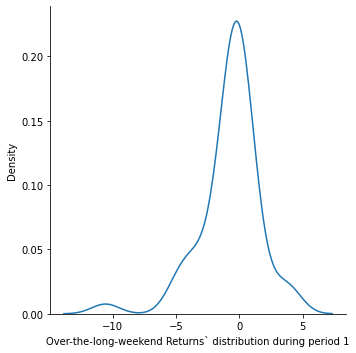

In [ ]:
p = sns.displot(data_long_TSLA[data_long_TSLA['Periods']=="period 1"], x="Long-weekend Returns", kind="kde")
p.set(xlabel='Over-the-long-weekend Returns` distribution during period 1', ylabel='Density')

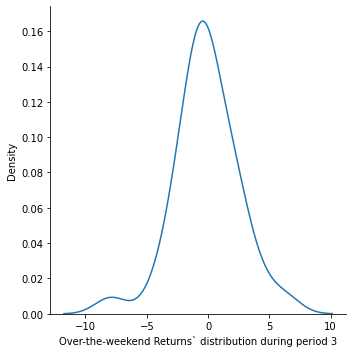

In [ ]:
p = sns.displot(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 3"], x="Weekend Returns", kind="kde")
p.set(xlabel='Over-the-weekend Returns` distribution during period 3', ylabel='Density')

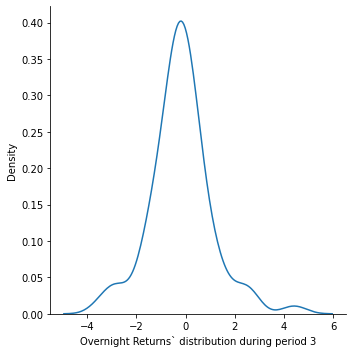

In [ ]:
p = sns.displot(data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 3"], x="Overnight Returns", kind="kde")
p.set(xlabel='Overnight Returns` distribution during period 3', ylabel='Density')

## **Summary Statistics**

In [ ]:
df1 = data_overnight_TSLA.describe()
df2 = data_weekends_TSLA.describe()
df3 = data_long_TSLA.describe()

frames = [df1, df2, df3]

result = pd.concat(frames, axis=1)
result

,Overnight Returns,Weekend Returns,Long-weekend Returns
count,1969.000000,456.000000,62.000000
mean,-0.126177,-0.211657,-0.645923
std,2.106437,2.270511,3.315769
min,-20.441386,-13.408771,-10.552408
25%,-0.820314,-1.109395,-1.753432
50%,-0.143255,-0.238910,-0.478594
75%,0.533739,0.480343,0.382823
max,14.210968,16.426109,17.505618


## **Boxplots**

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, subplot_titles=("Overnight", "Weekend", "Long-Weekend"))

# PERIOD 1

fig.add_trace(
    go.Box(y=data_overnight_TSLA['Overnight Returns'], x=data_overnight_TSLA['Periods'], name="Overnight Returns", jitter =1, marker=dict(size=3)),
    row=1, col=1)



# PERIOD 2

fig.add_trace(
    go.Box(y=data_weekends_TSLA['Weekend Returns'], x=data_weekends_TSLA['Periods'], name="Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=2
)


# PERIOD 3

fig.add_trace(
    go.Box(y=data_long_TSLA['Long-weekend Returns'], x=data_long_TSLA['Periods'], name="Long-Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=3
)

fig.update_layout(height=1000, width=1200, title_text="Boxplots of TSLA Returns")
fig.show()

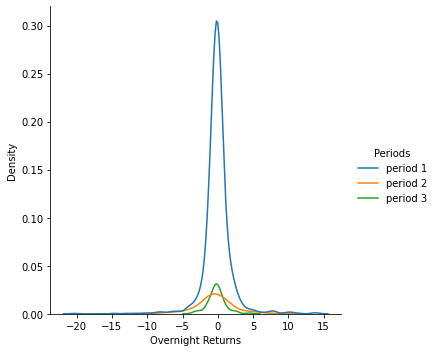

In [ ]:
sns.displot(data_overnight_TSLA, x="Overnight Returns", hue="Periods", kind="kde")

## **Kolmogorov-Smirnov test**

Perform the two-sample Kolmogorov-Smirnov test for goodness of fit. This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

$H_0:$ The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x.

$H_a:$ the alternative is that they are not identical.

In [ ]:
from scipy import stats

print("Long-Weekend and Weekend Returns for period 1:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns']))

print("Long-Weekend and Weekend Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']!="period 1"]['Long-weekend Returns'], data_weekends_TSLA[data_weekends_TSLA['Periods']!="period 1"]['Weekend Returns']))

Long-Weekend and Weekend Returns for period 1:Ks_2sampResult(statistic=0.13434684684684683, pvalue=0.38921133241615147)
Long-Weekend and Weekend Returns for period 2-3:Ks_2sampResult(statistic=0.26411960132890366, pvalue=0.31215082236795866)


In [ ]:
print("Long-Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns']))

print("Long-Weekend and Overnight Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']!="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']!="period 1"]['Overnight Returns']))


Long-Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.1466614090431125, pvalue=0.24375452439211398)
Long-Weekend and Overnight Returns for period 2-3:Ks_2sampResult(statistic=0.32589285714285715, pvalue=0.08871174810352644)


In [ ]:
print("Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 2:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 2"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 2"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 3:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 3"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 3"]['Overnight Returns']))

Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.06586239236081508, pvalue=0.1407397951933741)
Weekend and Overnight Returns for period 2:Ks_2sampResult(statistic=0.23607427055702918, pvalue=0.014336701765136683)
Weekend and Overnight Returns for period 3:Ks_2sampResult(statistic=0.23142414860681115, pvalue=0.08494312871319942)


In [ ]:
from scipy import stats

print("Long-Weekend and Weekend Returns for period 1:", end='')
print(stats.ks_2samp(data_long_TSLA['Long-weekend Returns'], data_weekends_TSLA['Weekend Returns']))

print("Overnight and Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_TSLA['Overnight Returns'], data_weekends_TSLA['Weekend Returns']))

print("Overnight and Long-Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_TSLA['Overnight Returns'], data_long_TSLA['Long-weekend Returns']))

Long-Weekend and Weekend Returns for period 1:Ks_2sampResult(statistic=0.15959252971137522, pvalue=0.10997119174120595)
Overnight and Weekend Returns:Ks_2sampResult(statistic=0.08847108248019744, pvalue=0.005646564699123835)
Overnight and Long-Weekend Returns:Ks_2sampResult(statistic=0.18399711659758516, pvalue=0.029644766323491556)


**Identical distributions for:**

1. Long-Weekend and Weekend returns are distributed identically at any reasonable significance level for **all periods**.

1. Overnight and Weekend returns are distributed identically at $10 \%$ significance level for **period 1** and are not distributed identically at the same significance leveles for **periods 2 and 3**.

1. Overnight and Long-Weekend returns at $10 \%$ significance levels are distributed identically for **period 1** and are not distributed identically for **periods 2-3** at $10 \%$ significance level.

## **Levene's test**

Levene's test is used to test if 2 given samples have equal variances. Equal variances across samples is called homogeneity of variance.

$H_0: \sigma^2_1 = \sigma^2_2$

$H_a: \sigma^2_1 \neq \sigma^2_2$

**Long-Weekend vs Weekend Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_weekends_TSLA['Weekend Returns'], data_long_TSLA['Long-weekend Returns'])

print(stat, p)

2.9585672208263656 0.08602319161362916


**Weekend vs Overnight Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns'])

print(stat, p)

0.812078136393959 0.36761767365420805


**Long-Weekend vs Overnight Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns'])

print(stat, p)

2.1038634977516684 0.1471197507727203


Difference between variances of **Long-Weekend vs Weekend Returns**, **Weekend vs Overnight Returns** and **Long-Weekend vs Overnight Returns** are not statistically significant due to highe $p$-values, threfore, ANOVA test can be applied.

## **ANOVA Test**

In [ ]:
from scipy.stats import f_oneway

F_stat, p_stat = f_oneway(data_weekends_TSLA['Weekend Returns'], data_long_TSLA['Long-weekend Returns'])

print("F-statistic: ", F_stat)
print("p-value: ", p_stat)

F-statistic:  1.7608285653881515
p-value:  0.18510808438982818


In [ ]:
from scipy.stats import f_oneway

F_stat, p_stat = f_oneway(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns'])

print("F-statistic: ", F_stat)
print("p-value: ", p_stat)

F-statistic:  0.21067406903416433
p-value:  0.6462906654745506


In [ ]:
from scipy.stats import f_oneway

F_stat, p_stat = f_oneway(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns'])

print("F-statistic: ", F_stat)
print("p-value: ", p_stat)

F-statistic:  4.99794426019287
p-value:  0.025512293657907577


1. ANOVA test results in high $p$-value for **Over-The-Weekend vs Over-The-Long-Weekend Returns** $\implies H_0$ cannot be rejected and thus **there are no statistically significant differences** between two samples at any reasonable significance levels. 

2. ANOVA test results in high $p$-value for **Over-The-Weekend vs Overnight Returns** $\implies H_0$ cannot be rejected and thus **there are no statistically significant differences** between two samples at any reasonable significance levels. 

3. $H_0$ is rejected at $10 \%$ significance level for **Over-The-Long-Weekend vs Overnight Returns**. Thus, difference between two samples are statistically significant.

# **NFLX**

In [ ]:
data_3 = pd.read_csv('HistoricalPrices (4).csv')

In [ ]:
data_3['Date'] =pd.to_datetime(data_3.Date)

In [ ]:
data_NFLX = data_3.sort_values(by="Date")
data_NFLX

,Date,Open,High,Low,Close,Volume
2521,2012-02-14,16.9986,17.7500,16.9357,17.5814,5.248816e+07
2520,2012-02-15,17.6614,17.9029,17.2986,17.4371,3.714995e+07
2519,2012-02-16,17.4586,17.7329,17.1429,17.4157,4.059424e+07
2518,2012-02-17,17.4471,17.5529,17.1500,17.4071,2.594504e+07
2517,2012-02-21,17.6927,18.0214,16.6686,16.7714,8.049027e+07
...,...,...,...,...,...,...
4,2022-02-14,387.5900,409.3600,386.8910,396.5700,7.202155e+06
3,2022-02-15,403.7900,409.1619,401.0100,407.4600,5.395641e+06
2,2022-02-16,401.5300,401.5600,390.3842,398.0800,5.277650e+06
1,2022-02-17,394.2350,399.1100,385.7000,386.6700,4.669222e+06


In [ ]:
data_NFLX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522 entries, 2521 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2522 non-null   datetime64[ns]
 1   Open    2522 non-null   float64       
 2   High    2522 non-null   float64       
 3   Low     2522 non-null   float64       
 4   Close   2522 non-null   float64       
 5   Volume  2522 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 137.9 KB


In [ ]:
import plotly.express as px

fig = px.scatter(data_NFLX, x="Date", y="Open", title='Open NFLX prices 2012-2022')

fig.update_traces(marker=dict(size=3))

fig.add_vline(x="2017-12-06", line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x="2019-09-25", line_width=3, line_dash="dash", line_color="red")

fig.show()

In [ ]:
data_NFLX['Date Difference'] = data_NFLX['Date'].diff()

In [ ]:
# each row is "today", the difference shows when the previous working day was

data_NFLX_overnight = data_NFLX.loc[data_NFLX['Date Difference'] == "1 days"] # open этого дня, close дня который был с индексом -1
data_NFLX_weekends = data_NFLX.loc[data_NFLX['Date Difference'] == "3 days"]
data_NFLX_long = data_NFLX.loc[data_NFLX['Date Difference'] == "4 days"]

### **Overnight Returns:**

$r_{NFLX} = \frac{P^c_{t-1}-P^o_t}{P^o_t} \cdot 100 \%$, where:

$r_{NFLX}$ - Return on a stock $NFLX$

$P^c_{t-1}$ - Close price of a stock at time $t-1$ – that is, the close price on the previous day $t-1$.

$P^o_{t}$ - Open price of a stock at time $t$ – that is, the open price on the current day $t$.

In [ ]:
overnight_returns_NFLX = []
dates_overnight_NFLX = []
for index in data_NFLX_overnight.iloc[1: , :].iterrows():
  P_t1 = data_NFLX["Close"][index[0]+1]
  P_t = data_NFLX_overnight["Open"][index[0]]
  overnight_returns_NFLX.append((P_t1 - P_t)/ P_t * 100)
  dates_overnight_NFLX.append(data_NFLX_overnight["Date"][index[0]])

#print(len(overnight_returns))
#print(len(data_SPX_overnight))

data_overnight_NFLX = pd.DataFrame({'Date':dates_overnight_NFLX, 'Overnight Returns':overnight_returns_NFLX})

conditions = [
    (data_overnight_NFLX['Date'] < '2017-12-06'),
    ((data_overnight_NFLX['Date'] >= '2017-12-06') & (data_overnight_NFLX['Date'] < '2019-09-25')),
    (data_overnight_NFLX['Date'] >= '2019-09-25')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_overnight_NFLX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_overnight_NFLX.head()

,Date,Overnight Returns,Periods
0,2012-02-16,-0.123148,period 1
1,2012-02-17,-0.179973,period 1
2,2012-02-22,2.166828,period 1
3,2012-02-23,0.761812,period 1
4,2012-02-24,0.097360,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_overnight_NFLX, y=overnight_returns_NFLX,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Overnight returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Overnight NFLX Returns, %')


fig.show()

### **Weekend Returns**

$r_{NFLX} = \frac{P^c_{F}-P^o_M}{P^o_M} \cdot 100 \%$, where:

$r_{NFLX}$ - Return on a stock $NFLX$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{M}$ - Open price of a stock on Monday $M$.

In [ ]:
weekend_returns_NFLX = []
dates_weekends_NFLX = []
for index in data_NFLX_weekends.iloc[1: , :].iterrows():
  P_t1 = data_NFLX["Close"][index[0]+1]
  P_t = data_NFLX_weekends["Open"][index[0]]
  weekend_returns_NFLX.append((P_t1 - P_t)/ P_t * 100)
  dates_weekends_NFLX.append(data_NFLX_weekends["Date"][index[0]])

#print(len(weekend_returns))
#print(len(data_SPX_weekends))

data_weekends_NFLX = pd.DataFrame({'Date':dates_weekends_NFLX, 'Weekend Returns':weekend_returns_NFLX})

conditions = [
    (data_weekends_NFLX['Date'] < '2017-12-06'),
    ((data_weekends_NFLX['Date'] >= '2017-12-06') & (data_weekends_NFLX['Date'] < '2019-09-25')),
    (data_weekends_NFLX['Date'] >= '2019-09-25')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_weekends_NFLX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_weekends_NFLX.head()

,Date,Weekend Returns,Periods
0,2012-03-05,0.349085,period 1
1,2012-03-12,1.280460,period 1
2,2012-03-19,0.411012,period 1
3,2012-03-26,-1.151410,period 1
4,2012-04-02,0.209146,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_weekends_NFLX, y=weekend_returns_NFLX,
                    mode='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Over-the-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Weekend Returns, %')

fig.show()

### **Long-Weekend Returns:**

$r_{NFLX} = \frac{P^c_{F}-P^o_T}{P^o_T} \cdot 100 \%$, where:

$r_{NFLX}$ - Return on a stock $NFLX$

$P^c_{F}$ - Close price of a stock on Friday $F$.

$P^o_{T}$ - Open price of a stock on Tuesday $T$.

In [ ]:
long_returns_NFLX = []
dates_long_NFLX = []
for index in data_NFLX_long.iloc[1: , :].iterrows():
  P_t1 = data_NFLX["Close"][index[0]+1]
  P_t = data_NFLX_long["Open"][index[0]]
  long_returns_NFLX.append((P_t1 - P_t) / P_t * 100)
  dates_long_NFLX.append(data_NFLX_long["Date"][index[0]])


data_long_NFLX = pd.DataFrame({'Date':dates_long_NFLX, 'Long-weekend Returns':long_returns_NFLX})

conditions = [
    (data_long_NFLX['Date'] < '2017-12-06'),
    ((data_long_NFLX['Date'] >= '2017-12-06') & (data_long_NFLX['Date'] < '2019-09-25')),
    (data_long_NFLX['Date'] >= '2019-09-25')
    ]

# create a list of the values we want to assign for each condition
values = ['period 1', 'period 2', 'period 3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_long_NFLX['Periods'] = np.select(conditions, values)

# display updated DataFrame
data_long_NFLX.head()

,Date,Long-weekend Returns,Periods
0,2012-04-09,1.600041,period 1
1,2012-05-29,-1.182103,period 1
2,2012-09-04,2.965350,period 1
3,2013-01-22,-0.481887,period 1
4,2013-02-19,-0.779163,period 1


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_long_NFLX, y=long_returns_NFLX,
                    mode='lines',
                    name='lines',
                    line=dict(color='royalblue', width=1)))

fig.update_layout(title='Over-the-long-weekend returns 2012-2022',
                   xaxis_title='Year',
                   yaxis_title='Long-weekend NFLX Returns, %')

fig.show()

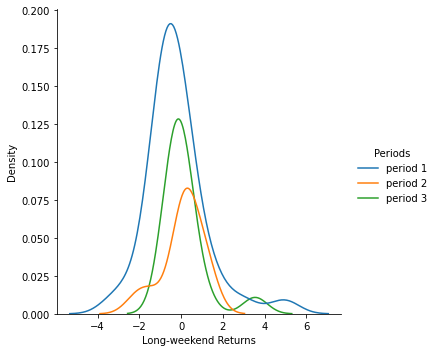

In [ ]:
sns.displot(data_long_NFLX, x="Long-weekend Returns", hue="Periods", kind="kde")

## **Statistical Analysis of the results**

### **Check for Normality**

**Long-Weekend Returns**

In [ ]:
print(stats.kstest(data_long_NFLX[data_long_NFLX['Periods']=="period 1"]['Long-weekend Returns'], 'norm'))
print(stats.kstest(data_long_NFLX[data_long_NFLX['Periods']!="period 1"]['Long-weekend Returns'], 'norm'))

KstestResult(statistic=0.22952192682390582, pvalue=0.042010458864614415)
KstestResult(statistic=0.19161973165889915, pvalue=0.22487070621202507)


**Weekend Returns**

In [ ]:
print(stats.kstest(data_weekends_NFLX[data_weekends_NFLX['Periods']=="period 1"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_NFLX[data_weekends_NFLX['Periods']=="period 2"]['Weekend Returns'], 'norm'))
print(stats.kstest(data_weekends_NFLX[data_weekends_NFLX['Periods']=="period 3"]['Weekend Returns'], 'norm'))

KstestResult(statistic=0.09310459609999755, pvalue=0.018904185420534046)
KstestResult(statistic=0.12854745851726407, pvalue=0.12178325917696742)
KstestResult(statistic=0.10601158378901876, pvalue=0.1606039798192822)


**Overnight Returns**

In [ ]:
print(stats.kstest(data_overnight_NFLX[data_overnight_NFLX['Periods']=="period 1"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_NFLX[data_overnight_NFLX['Periods']=="period 2"]['Overnight Returns'], 'norm'))
print(stats.kstest(data_overnight_NFLX[data_overnight_NFLX['Periods']=="period 3"]['Overnight Returns'], 'norm'))

KstestResult(statistic=0.12194575469808133, pvalue=2.8550916319720873e-15)
KstestResult(statistic=0.10295392429934991, pvalue=0.0010587256838868052)
KstestResult(statistic=0.1229588186040097, pvalue=9.615903355548087e-07)


1. Over-The-Long-Weekend Returns are distributed according to a normal distribution for **all periods** at $1 \%$ significance level.

2. Over-The-Weekend Returns are distributed according to a normal distribution for **periods 2 and 3** at any reasonable significance levels.

3. Overnight Returns are not distributed according to a normal distribution only for **any periods** at any reasonable significance level.

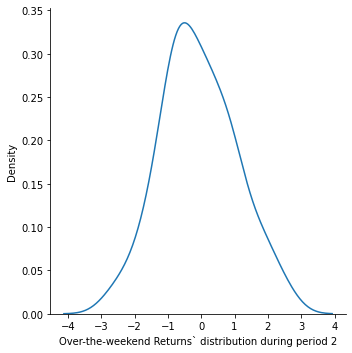

In [ ]:
p = sns.displot(data_weekends_NFLX[data_weekends_NFLX['Periods']=="period 2"], x="Weekend Returns", kind="kde")
p.set(xlabel='Over-the-weekend Returns` distribution during period 2', ylabel='Density')

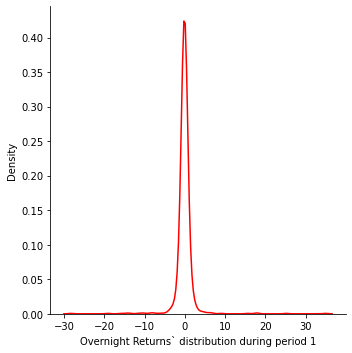

In [ ]:
p = sns.displot(data_overnight_NFLX[data_overnight_NFLX['Periods']=="period 1"], x="Overnight Returns", kind="kde", color='red')
p.set(xlabel='Overnight Returns` distribution during period 1', ylabel='Density')

### **Summary Statistics**

In [ ]:
df1 = data_overnight_NFLX.describe()
df2 = data_weekends_NFLX.describe()
df3 = data_long_NFLX.describe()

frames = [df1, df2, df3]

result = pd.concat(frames, axis=1)
result

,Overnight Returns,Weekend Returns,Long-weekend Returns
count,1972.000000,456.000000,63.000000
mean,-0.090195,0.005793,-0.067012
std,2.137219,1.482689,1.255063
min,-28.286825,-6.772033,-3.222962
25%,-0.589324,-0.630847,-0.747161
50%,-0.111405,-0.028424,-0.109257
75%,0.355992,0.477274,0.310848
max,34.820935,17.138028,4.935780


## **Boxplots**

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, subplot_titles=("Overnight", "Weekend", "Long-Weekend"))

# PERIOD 1

fig.add_trace(
    go.Box(y=data_overnight_NFLX['Overnight Returns'], x=data_overnight_NFLX['Periods'], name="Overnight Returns", jitter =1, marker=dict(size=3)),
    row=1, col=1)



# PERIOD 2

fig.add_trace(
    go.Box(y=data_weekends_NFLX['Weekend Returns'], x=data_weekends_NFLX['Periods'], name="Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=2
)


# PERIOD 3

fig.add_trace(
    go.Box(y=data_long_NFLX['Long-weekend Returns'], x=data_long_NFLX['Periods'], name="Long-Weekend Returns", jitter =1, marker=dict(size=3)),
    row=1, col=3
)

fig.update_layout(height=1000, width=1200, title_text="Boxplots of NFLX Returns")
fig.show()

## **Kolmogorov-Smirnov test**

Perform the two-sample Kolmogorov-Smirnov test for goodness of fit. This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

$H_0:$ The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x.

$H_a:$ the alternative is that they are not identical.

In [ ]:
print("Long-Weekend and Weekend Returns for period 1:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns']))

print("Long-Weekend and Weekend Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']!="period 1"]['Long-weekend Returns'], data_weekends_TSLA[data_weekends_TSLA['Periods']!="period 1"]['Weekend Returns']))



Long-Weekend and Weekend Returns for period 1:Ks_2sampResult(statistic=0.13434684684684683, pvalue=0.38921133241615147)
Long-Weekend and Weekend Returns for period 2-3:Ks_2sampResult(statistic=0.26411960132890366, pvalue=0.31215082236795866)


In [ ]:
print("Long-Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']=="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns']))

print("Long-Weekend and Overnight Returns for period 2-3:", end='')
print(stats.ks_2samp(data_long_TSLA[data_long_TSLA['Periods']!="period 1"]['Long-weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']!="period 1"]['Overnight Returns']))



Long-Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.1466614090431125, pvalue=0.24375452439211398)
Long-Weekend and Overnight Returns for period 2-3:Ks_2sampResult(statistic=0.32589285714285715, pvalue=0.08871174810352644)


In [ ]:


print("Weekend and Overnight Returns for period 1:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 1"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 1"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 2:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 2"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 2"]['Overnight Returns']))

print("Weekend and Overnight Returns for period 3:", end='')
print(stats.ks_2samp(data_weekends_TSLA[data_weekends_TSLA['Periods']=="period 3"]['Weekend Returns'], data_overnight_TSLA[data_overnight_TSLA['Periods']=="period 3"]['Overnight Returns']))

Weekend and Overnight Returns for period 1:Ks_2sampResult(statistic=0.06586239236081508, pvalue=0.1407397951933741)
Weekend and Overnight Returns for period 2:Ks_2sampResult(statistic=0.23607427055702918, pvalue=0.014336701765136683)
Weekend and Overnight Returns for period 3:Ks_2sampResult(statistic=0.23142414860681115, pvalue=0.08494312871319942)


In [ ]:
from scipy import stats

print("Long-Weekend and Weekend Returns:", end='')
print(stats.ks_2samp(data_long_NFLX['Long-weekend Returns'], data_weekends_NFLX['Weekend Returns']))

print("Overnight and Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_NFLX['Overnight Returns'], data_weekends_NFLX['Weekend Returns']))

print("Overnight and Long-Weekend Returns:", end='')
print(stats.ks_2samp(data_overnight_NFLX['Overnight Returns'], data_long_NFLX['Long-weekend Returns']))

Long-Weekend and Weekend Returns:Ks_2sampResult(statistic=0.10119047619047619, pvalue=0.5832200845078614)
Overnight and Weekend Returns:Ks_2sampResult(statistic=0.060620618483328, pvalue=0.12538752467133996)
Overnight and Long-Weekend Returns:Ks_2sampResult(statistic=0.09190572780836473, pvalue=0.6460394894018032)


According to the derived high $p$-values, $H_0$ should not be rejected for all three types of returns. Therefore, distributions for **Over-the-weekend, Overnight and Over-the-long-weekend Returns** can be considered identical at any reasonable significance levels.

## **Levene's Test**

Levene's test is used to test if 3 given samples have equal variances. Equal variances across samples is called homogeneity of variance.

$H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3$

$H_a: \sigma^2_i \neq \sigma^2_j$

**Long-Weekend vs Weekend vs Overnight Returns:**

In [ ]:
from scipy.stats import levene

# Levene's Test in Python with Scipy:
stat, p = levene(data_weekends_NFLX['Weekend Returns'], data_long_NFLX['Long-weekend Returns'], data_overnight_NFLX['Overnight Returns'])

print(stat, p)

0.23283264711482166 0.7923034149640706


According to a huge $p$-value, $H_0$ should not be rejected at any reasonable significance levels. Therefore, homogeneity of variances takes place. So, we can apply other statistical tests: their results will be correct in terms of statistics.

## **ANOVA Test**

Use ANOVA test in order to check whether differences within groups are statistically different. The null hypothesis is that there is no difference among group means.

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_a: \mu_i \neq \mu_j$

**Weekend and Long-Weekend Returns:**

In [ ]:
F_stat, p_stat = f_oneway(data_overnight_NFLX['Overnight Returns'], data_weekends_NFLX['Weekend Returns'], data_long_NFLX['Long-weekend Returns'])

print("F-statistic: ", F_stat)

print("p-value: ", p_stat)

F-statistic:  0.42046563827274347
p-value:  0.6567876024790598


According to a huge $p$-value ($0.657$), one can conclude that at any reasonable significance levels $H_0$ should not be rejected. Therefore, statistical difference between **Overnight, Over-the-weekend and Over-the-long-long-weekend Returns** is not signifcant.